In [30]:
import pandas as pd

filename = r'C:\\sqlite\\mysql\\code\\AI\\Mid_project\\data\\all.xlsx'

df = pd.read_excel(filename)
df

,Unnamed: 0,사고번호,사고일시,요일,시군구,사고유형,법규위반,노면상태,기상상태,도로형태,...,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,어린이보호구역,연도,월,일,시간,도/시,시/구
0,0,2017010200100403,2017년 1월 2일 19시,월요일,서울특별시 중랑구 면목동,차대사람 - 횡단중,안전운전불이행,건조,맑음,단일로 - 기타,...,남,12,경상,0,2017,1,2,19,서울특별시,중랑구
1,1,2017010300100250,2017년 1월 3일 12시,화요일,서울특별시 노원구 하계동,차대차 - 측면충돌,안전운전불이행,건조,맑음,단일로 - 기타,...,남,8,부상신고,0,2017,1,3,12,서울특별시,노원구
2,2,2017010400100297,2017년 1월 4일 15시,수요일,서울특별시 송파구 문정동,차대차 - 측면충돌,안전운전불이행,건조,맑음,단일로 - 기타,...,남,12,중상,0,2017,1,4,15,서울특별시,송파구
3,3,2017010400100442,2017년 1월 4일 19시,수요일,서울특별시 관악구 신림동,차대사람 - 횡단중,안전운전불이행,건조,맑음,교차로 - 교차로부근,...,남,8,경상,0,2017,1,4,19,서울특별시,관악구
4,4,2017010500100479,2017년 1월 5일 21시,목요일,서울특별시 성북구 장위동,차대사람 - 기타,안전운전불이행,건조,맑음,단일로 - 기타,...,남,4,경상,0,2017,1,5,21,서울특별시,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,8960,2022122800100308,2022년 12월 28일 14시,수요일,경기도 남양주시 진접읍,차대사람 - 횡단중,신호위반,건조,맑음,교차로 - 교차로안,...,여,7,경상,0,2022,12,28,14,경기도,남양주시
8961,8961,2022122900100255,2022년 12월 29일 13시,목요일,경기도 동두천시 지행동,차대사람 - 횡단중,신호위반,건조,맑음,기타 - 기타,...,남,10,경상,0,2022,12,29,13,경기도,동두천시
8962,8962,2022122900100396,2022년 12월 29일 17시,목요일,경기도 화성시 장지동,차대사람 - 횡단중,기타,건조,맑음,교차로 - 교차로횡단보도내,...,남,7,중상,1,2022,12,29,17,경기도,화성시
8963,8963,2022122900100417,2022년 12월 29일 17시,목요일,경기도 가평군 북면,차대사람 - 기타,안전운전불이행,건조,맑음,기타 - 기타,...,여,10,중상,0,2022,12,29,17,경기도,가평군


In [31]:
df.isnull().sum()

Unnamed: 0    0
사고번호          0
사고일시          0
요일            0
시군구           0
사고유형          0
법규위반          0
노면상태          0
기상상태          0
도로형태          0
가해운전자 차종      0
가해운전자 성별      0
가해운전자 연령      0
가해운전자 상해정도    0
피해운전자 차종      0
피해운전자 성별      0
피해운전자 연령      0
피해운전자 상해정도    0
어린이보호구역       0
연도            0
월             0
일             0
시간            0
도/시           0
시/구           0
dtype: int64

In [32]:
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

In [33]:
df['연'] = df['사고일시'].dt.year
df['월'] = df['사고일시'].dt.month
df['일'] = df['사고일시'].dt.day
df['시간'] = df['사고일시'].dt.hour

In [34]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [35]:
# df.drop(['Unnamed: 0','사고내용','사망자수', '중상자수', '경상자수','부상신고자수'], axis=1, inplace=True)

In [36]:
df['월'] = df['월'].shift()

In [37]:
df[['시', '구', '동']] = df['시군구'].str.split(' ', expand=True).iloc[:, :3]

In [38]:
# df['구'] = df['동'].str.split(' ').str[0]
# df['동'] = df['동'].str.split(' ').str[1]

In [39]:
df['피해운전자 연령'].astype(int)

0       12
1        8
2       12
3        8
4        4
        ..
8960     7
8961    10
8962     7
8963    10
8964     9
Name: 피해운전자 연령, Length: 8965, dtype: int32

In [40]:
# df.to_excel('C:\\sqlite\\mysql\\code\\AI\\num.xlsx', index=False)

In [41]:
data = df[~df['피해운전자 상해정도'].str.contains('상해없음')]

In [42]:
columns_sum = data.groupby(['시간', '피해운전자 상해정도', '시']).size().reset_index(name='counts')

In [43]:
# columns_sum

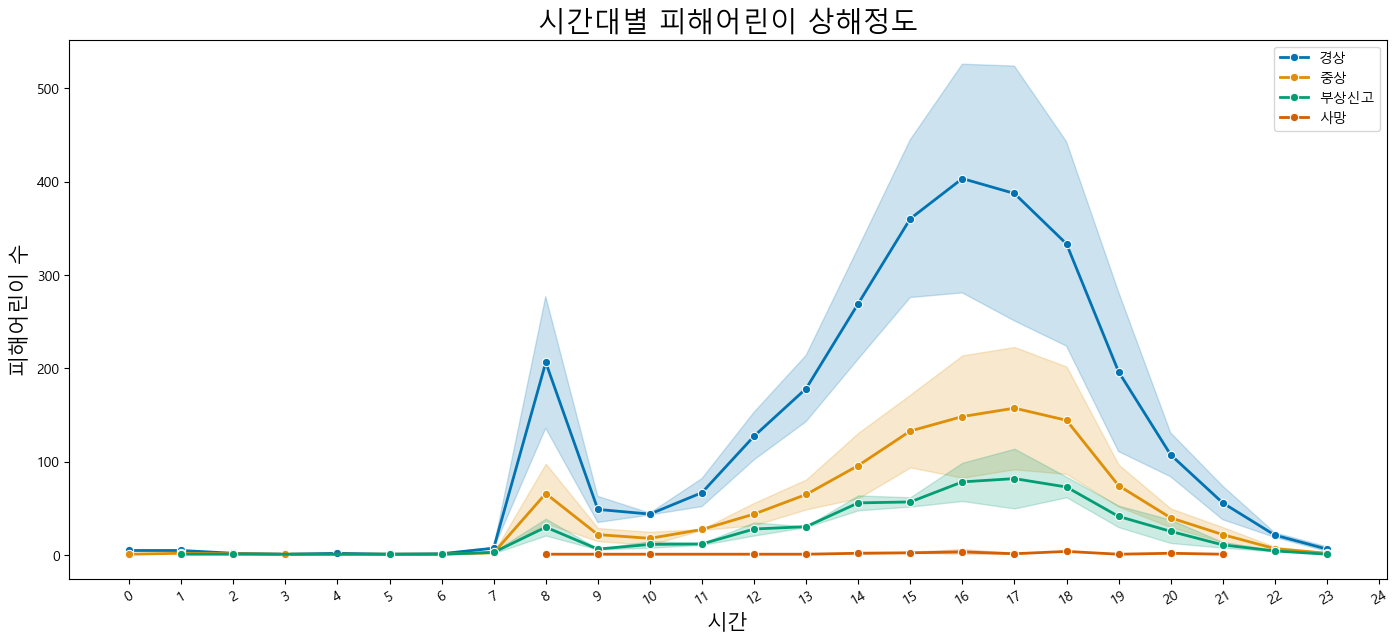

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 7))
sns.lineplot(x='시간', y='counts', hue='피해운전자 상해정도', data=columns_sum, palette='colorblind', linewidth=2,marker='o')

plt.rc('font', family='Malgun Gothic')
plt.title('시간대별 피해어린이 상해정도', fontsize=20) 
plt.xlabel('시간', fontsize=15)
plt.xticks(range(0, 25, 1),rotation = 30)
plt.ylabel('피해어린이 수', fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['경상', '중상','부상신고', '사망'] 
plt.legend(handles, new_labels)

plt.show()

In [45]:
import plotly.express as px
fig = px.bar(df, x='요일',y='피해운전자 연령',color='피해운전자 성별', height=1000, width=1000)
fig.show()

In [46]:
columns_sum_2 = df.groupby(['구', '피해운전자 상해정도', '시']).size().reset_index(name='counts')

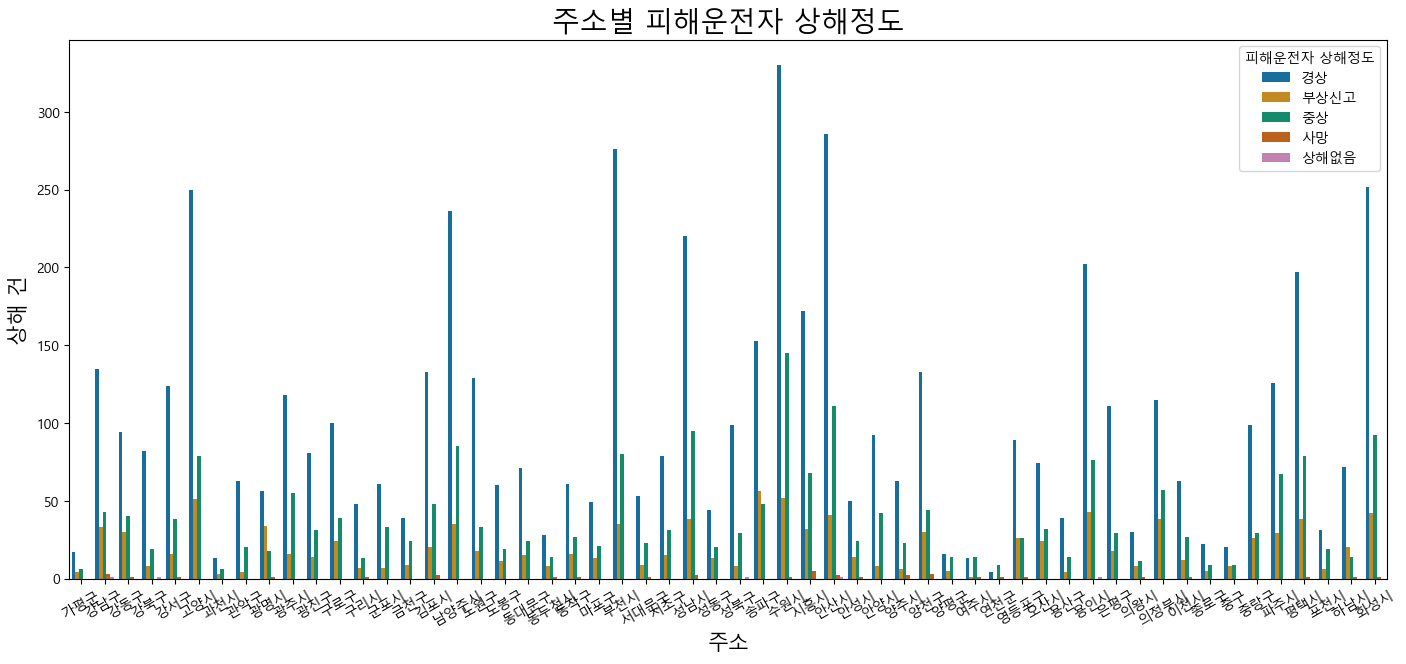

In [47]:
fig = plt.subplots(figsize=(17, 7))

# color_dict = {'경상': 'skyblue', '중상': 'gray', '부상신고': 'gray', '상해없음': 'gray', '사망': 'gray'}

sns.barplot(x='구', y='counts', hue='피해운전자 상해정도', data=columns_sum_2, palette='colorblind')

plt.rc('font', family='Malgun Gothic')
plt.title('주소별 피해운전자 상해정도', fontsize=20)
plt.xlabel('주소', fontsize=15)
plt.xticks(rotation = 30)
plt.ylabel('상해 건', fontsize=15)

plt.show()